In [ ]:
Becca Atkins
HW-05-Matplotlib HW

Key Learnings:
    Of the four drugs compared over a 45 day period, Capomulin was the only drug deemed effective. It was the only one of
    the four drugs that saw a decrease in tumor volume, saw the lowest levels of metastic spread, had the highest survival 
    rate throughout the test, and ultimately saw a 19% decrease in tumors.
    
    Infubinol may have been causing false hope, as the growth of tumor volume was ever-so-slightly less than the other two
    drugs, with a lower rate of metastic spread. However promising it may have seemed, the survival rates were among the 
    lowest with this drug especially nearing the end of the study, and was ultimately not effective in lowering the tumor 
    volume.
    
    While Capomulin was the the only drug that decreased tumor volume, Infubinol and Ketapril potentially could have slowed
    metastic spreading.  As both displayed slightly slower rates of metastic spreading over-time when compared to the placebo. 
    Despite lower rates of metastic spread, Ketapril saw the highest increase of tumors indicating more tumors though 
    potentially benign.

In [9]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"


In [10]:
# Read the Mouse and Drug Data and the Clinical Trial Data
df1 = pd.read_csv(mouse_drug_data_to_load)
df2 = pd.read_csv(clinical_trial_data_to_load)

In [11]:
# Display the data table for preview
full_df = pd.merge(df1, df2, on='Mouse ID', how ='left')
full_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [12]:
full_df.columns

Index(['Mouse ID', 'Drug', 'Timepoint', 'Tumor Volume (mm3)',
       'Metastatic Sites'],
      dtype='object')

## Tumor Response to Treatment

In [13]:
# Groupby drug and timepoint, then average
mean_tumor = full_df.groupby(['Drug','Timepoint'])["Tumor Volume (mm3)"].mean()
mean_tumor.head()

Drug       Timepoint
Capomulin  0            45.000000
           5            44.266086
           10           43.084291
           15           42.064317
           20           40.716325
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Convert to DataFrame
mean_tumor_df = pd.DataFrame(mean_tumor).reset_index()
type(mean_tumor_df)

pandas.core.frame.DataFrame

In [15]:
# Preview DataFrame
mean_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [22]:
# groupby Drug and Timepoint then find standard error
sem_tumor = full_df.groupby(['Drug','Timepoint'])["Tumor Volume (mm3)"].sem()
sem_tumor.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.448593
           10           0.702684
           15           0.838617
           20           0.909731
Name: Tumor Volume (mm3), dtype: float64

In [23]:
# Convert to DataFrame
sem_tumor_df = pd.DataFrame(sem_tumor).reset_index()
sem_tumor_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [24]:
#Reformat the Mean Tumor DF
mean_pivot = mean_tumor_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

In [25]:
# Preview that Reformatting worked
mean_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [30]:
#Reformat the Mean Tumor DF
sem_pivot = sem_tumor_df.pivot(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


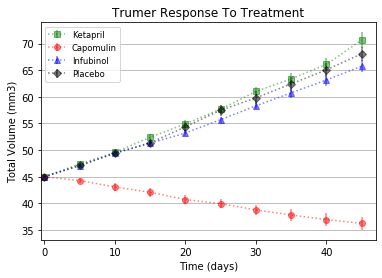

In [31]:
# Plot sample means with error bars
fig, ax = plt.subplots()

ax.errorbar(mean_pivot.index, mean_pivot.Ketapril, yerr=sem_pivot.Ketapril, fmt="s", color="g",
            alpha=0.5, label="Ketapril", ls=":")
#chagne for Capomulin
ax.errorbar(mean_pivot.index, mean_pivot.Capomulin, yerr=sem_pivot.Capomulin, fmt="o", color="r",
            alpha=0.5, label="Capomulin", ls=":")
#chagne for Infubinol
ax.errorbar(mean_pivot.index, mean_pivot.Infubinol, yerr=sem_pivot.Infubinol, fmt="^", color="b",
            alpha=0.5, label="Infubinol", ls=":")
#chagne for Placebo
ax.errorbar(mean_pivot.index, mean_pivot.Placebo, yerr=sem_pivot.Placebo, fmt="D", color="k",
            alpha=0.5, label="Placebo", ls=":")

ax.set_xlim(-0.5, 47)

ax.set_xlabel("Time (days)")
ax.set_ylabel("Total Volume (mm3)")

plt.legend(loc="best", fontsize="small", fancybox=True)

ax.set_title("Trumer Response To Treatment")

plt.grid(axis="y")

plt.show()


In [32]:
# Save the Figure
fig.savefig('Response_to_Treatment.png')

## Metastatic Response to Treatment

In [33]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = full_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean().unstack('Drug')

In [34]:
# Convert into DF
mean_met_df = pd.DataFrame(mean_met)
mean_met_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [35]:
# groupby Drug and Timepoint then find standard error
sem_met = full_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem().unstack('Drug')

In [36]:
# Convert into DF
sem_met_df = pd.DataFrame(sem_met)
sem_met_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


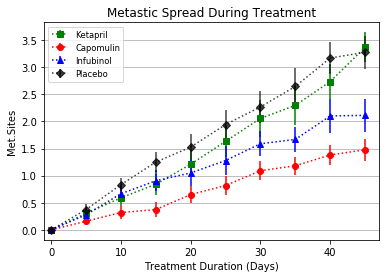

In [37]:
# Plot with error bars
fig, ax = plt.subplots()

ax.errorbar(mean_met_df.index, mean_met_df.Ketapril, yerr=sem_met_df.Ketapril, fmt="s", color="g",
            alpha=1, label= 'Ketapril', ls=":")
#chagne for Capomulin
ax.errorbar(mean_met_df.index, mean_met_df.Capomulin, yerr=sem_met_df.Capomulin, fmt="o", color="r",
            alpha=1, label="Capomulin", ls=":")
#chagne for Infubinol
ax.errorbar(mean_met_df.index, mean_met_df.Infubinol, yerr=sem_met_df.Infubinol, fmt="^", color="b",
            alpha=1, label="Infubinol", ls=":")
#chagne for Placebo
ax.errorbar(mean_met_df.index, mean_met_df.Placebo, yerr=sem_met_df.Placebo, fmt="D", color="k",
            alpha=0.75, label="Placebo", ls=":")

ax.set_xlim(-1, 47)

ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met.Sites")

plt.legend(loc="best", fontsize="small", fancybox=True)

ax.set_title("Metastic Spread During Treatment")

plt.grid(axis="y")

plt.show()


In [38]:
# Save the Figure
fig.savefig('Metastic_Spread.png')

## Survival Rates

In [39]:
# Convert to DF
count_mouse = full_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

In [40]:
# Groupby drug and timepoint, then count
count_mouse_df = pd.DataFrame(count_mouse).reset_index()
count_mouse_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [41]:
# Reformat to pivot
count_mouse_pivot = count_mouse_df.pivot(index="Timepoint", columns="Drug", values="Mouse ID")
count_mouse_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [42]:
#notice that some have different numbers

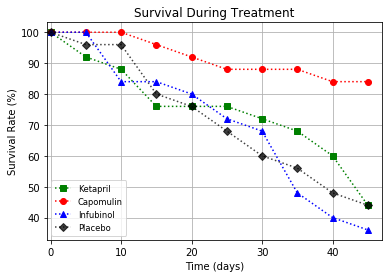

In [43]:
# Plot sample means with error bars
# convert to percent of count by dividing by total of mice then multiply by 100
fig, ax = plt.subplots()

ax.plot(count_mouse_pivot.index.values, (count_mouse_pivot.Ketapril.values/count_mouse_pivot.Ketapril.values[0] * 100), marker="s", color="g",
            alpha=1, label="Ketapril", ls=":")

ax.plot(count_mouse_pivot.index.values, (count_mouse_pivot.Capomulin.values/count_mouse_pivot.Capomulin.values[0] * 100), marker="o", color="r",
            alpha=1, label="Capomulin", ls=":")

ax.plot(count_mouse_pivot.index.values, (count_mouse_pivot.Infubinol.values/count_mouse_pivot.Infubinol.values[0] * 100), marker="^", color="b",
            alpha=1, label="Infubinol", ls=":")

ax.plot(count_mouse_pivot.index.values, (count_mouse_pivot.Placebo.values/count_mouse_pivot.Placebo.values[0] * 100), marker="D", color="k",
            alpha=0.75, label="Placebo", ls=":")

ax.set_xlim(-0.5, 47)

ax.set_title("Survival During Treatment")

ax.set_xlabel("Time (days)")
ax.set_ylabel("Survival Rate (%)")

plt.legend(loc="best", fontsize="small", fancybox=True)

plt.grid(axis='both')

plt.show()

In [44]:
# Save Figure
fig.savefig('Mouse_Survival.png')

## Summary Bar Graph

In [45]:
mean_tumor_df.head(20)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [46]:
# Calculate the percent changes for each drug
tumor_change = [(mean_pivot.iloc[9,:] - mean_pivot.iloc[0,:]) / mean_pivot.iloc[0,:] * 100]
tumor_change

[Drug
 Capomulin   -19.475303
 Ceftamin     42.516492
 Infubinol    46.123472
 Ketapril     57.028795
 Naftisol     53.923347
 Placebo      51.297960
 Propriva     47.241175
 Ramicane    -22.320900
 Stelasyn     52.085134
 Zoniferol    46.579751
 dtype: float64]

In [105]:
#Create Axis Data
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']
bars_for_drugs = pd.Series([-19.475303,46.123472,57.028795,51.297960])
x_axis = np.arange(len(bars_for_drugs))

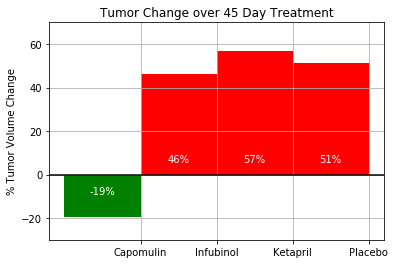

In [106]:
#Splice positive and negative data and create plot
passing = (bars_for_drugs <= 0)
tumor_plt = plt.bar(drug_list, bars_for_drugs, width=-1,align='edge',color=passing.map({True:'g',False:'r'}))
#Add all of the formatting
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')
plt.axhline(y=0, color = 'black')
#Add the % lables 
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 5
        else:
            label_position = -10
        plt.text(rect.get_x() + rect.get_width()/2., label_position,'%d' % int(height)+'%',color='white',ha='center', va='bottom')
autolabel(tumor_plt)


In [107]:
#Save Figure
fig.savefig('Tumor_change_over_time.png')